In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")   

## 1. 导入数据集，初探数据

In [2]:
data = pd.read_csv("bra.csv")     # 导入数据
colors = pd.read_csv('colors.csv',index_col=0)

In [3]:
data.head()     # 查看前五列

,creationTime,productColor,productSize
0,2016-06-08 17:17:00,22咖啡色,75C
1,2017-04-07 19:34:25,22咖啡色,80B
2,2016-06-18 19:44:56,02粉色,80C
3,2017-08-03 20:39:18,22咖啡色,80B
4,2016-07-06 14:02:08,22咖啡色,75B


In [4]:
colors.head()

,0,1
0,22咖啡色,棕色
1,02粉色,粉色
2,071蓝色,蓝色
3,071黑色,黑色
4,071肤色,肤色


In [5]:
data.info()

'''
productColor和productSize属性只有15496条记录，各有一个缺失值
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15497 entries, 0 to 15496
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   creationTime  15497 non-null  object
 1   productColor  15496 non-null  object
 2   productSize   15496 non-null  object
dtypes: object(3)
memory usage: 363.3+ KB


'\nproductColor和productSize属性只有15496条记录，各有一个缺失值\n'

In [6]:
data.describe()    # 进行描述性分析

,creationTime,productColor,productSize
count,15497,15496,15496
unique,14988,117,120
top,2017-06-30 12:08:27,肤色,80B/36B
freq,2,1582,2580


In [7]:
colors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 117
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       117 non-null    object
 1   1       117 non-null    object
dtypes: object(2)
memory usage: 2.8+ KB


## 2. 数据预处理

### 2.1 缺失值处理

In [8]:
data['productColor'].isnull().sum()

1

In [9]:
'''
只有一条记录有缺失值，所以，可直接删除缺失值
'''
data = data.dropna()      # 直接删除缺失值

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15496 entries, 0 to 15496
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   creationTime  15496 non-null  object
 1   productColor  15496 non-null  object
 2   productSize   15496 non-null  object
dtypes: object(3)
memory usage: 484.2+ KB


In [11]:
'''进行描述性统计分析'''
data.describe()

,creationTime,productColor,productSize
count,15496,15496,15496
unique,14987,117,120
top,2017-06-30 12:08:27,肤色,80B/36B
freq,2,1582,2580


### 2.2 将creationTime属性转换为日期型

In [12]:
data.loc[:,'creationTime'] = pd.to_datetime(data.loc[:,'creationTime'])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15496 entries, 0 to 15496
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   creationTime  15496 non-null  datetime64[ns]
 1   productColor  15496 non-null  object        
 2   productSize   15496 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 484.2+ KB


In [14]:
'''从creationTime属性获取年月日'''

data['year'] = data['creationTime'].dt.year
data['month'] = data['creationTime'].dt.month
data['day'] = data['creationTime'].dt.day

In [15]:
data[:10]     # 查看数据

,creationTime,productColor,productSize,year,month,day
0,2016-06-08 17:17:00,22咖啡色,75C,2016,6,8
1,2017-04-07 19:34:25,22咖啡色,80B,2017,4,7
2,2016-06-18 19:44:56,02粉色,80C,2016,6,18
3,2017-08-03 20:39:18,22咖啡色,80B,2017,8,3
4,2016-07-06 14:02:08,22咖啡色,75B,2016,7,6
5,2017-03-18 11:49:55,22咖啡色,80B,2017,3,18
6,2017-01-13 13:43:06,22咖啡色,80B,2017,1,13
7,2016-07-10 22:22:56,22咖啡色,80B,2016,7,10
8,2016-07-15 14:34:23,22咖啡色,80B,2016,7,15
9,2017-03-27 12:54:43,22咖啡色,70C,2017,3,27


In [16]:
'''重新排序数据框'''
columns = ['creationTime','year','month','day','productColor','productSize']
data = data[columns]
data.head()

,creationTime,year,month,day,productColor,productSize
0,2016-06-08 17:17:00,2016,6,8,22咖啡色,75C
1,2017-04-07 19:34:25,2017,4,7,22咖啡色,80B
2,2016-06-18 19:44:56,2016,6,18,02粉色,80C
3,2017-08-03 20:39:18,2017,8,3,22咖啡色,80B
4,2016-07-06 14:02:08,2016,7,6,22咖啡色,75B


### 2.3 异常值处理

In [17]:
data['year'].value_counts()      # 查看年份销售情况

2017    13880
2016     1614
2015        1
2014        1
Name: year, dtype: int64

#### 2014年和2015年只销售了一件内衣，明显不符合常理，因此，可将这两条记录当作异常值处理（或者我们不做分析）

In [18]:
'''通过索引删除年份为2014和2015的记录'''
data = data.drop(data[data['year']==2014].index)
data = data.drop(data[data['year']==2015].index)

In [19]:
data['year'].value_counts()      # 查看删除结果

2017    13880
2016     1614
Name: year, dtype: int64

In [20]:
data.index = np.arange(len(data))   # 删除数据之后修改索引

### 2.4 统一颜色

In [21]:
'''在统一颜色之前，先将内衣种类分为bra和suit，为后续添加内裤种类做准备'''
data['type'] = 'bra'
data.type[data.productColor.str.contains('套装')] = 'suit' 

In [22]:
'''对照colors表将内衣颜色统一化'''

key_list = colors['0']
value_list = colors['1']
color_dict = dict(zip(key_list,value_list))     # 将colors数据框转换成字典

data['productColor'] = data['productColor'].replace(color_dict)    # 通过字典匹配颜色，然后进行替换

data.head()

,creationTime,year,month,day,productColor,productSize,type
0,2016-06-08 17:17:00,2016,6,8,棕色,75C,bra
1,2017-04-07 19:34:25,2017,4,7,棕色,80B,bra
2,2016-06-18 19:44:56,2016,6,18,粉色,80C,bra
3,2017-08-03 20:39:18,2017,8,3,棕色,80B,bra
4,2016-07-06 14:02:08,2016,7,6,棕色,75B,bra


### 2.5 统一尺码

In [23]:
'''
由于数据集中文胸尺码十分混乱，不仅有国际尺码、英式尺码，还有身高体重的信息，需要统一尺码，
而该数据集大部分都使用的是国际尺码，所以，将尺码统一成国际尺码。

'''
import re


df = data.copy()
regex1 = re.compile(r'(\d{2}[A-Z])',flags = re.IGNORECASE)       # 获取文胸尺码
regex2 = re.compile(r'([A-Z][7-9]\d)',flags = re.IGNORECASE)      # 提取出字母在前数字在后的尺码


for i in range(df.shape[0]):
    try:
        if regex1.findall(df['productSize'][i]):
            r1 = max(regex1.findall(str(df['productSize'][i])))      # 选择尺码大的（国际尺码）
            df['productSize'][i] = r1[:2] + r1[-1].upper()         # 将小写字母改成大写字母

        elif regex2.findall(df['productSize'][i]):
            r2 =regex2.findall(df['productSize'][i])[0]
            df['productSize'][i] = r2[1:] + r2[0].upper()    # 将小写字母改成大写字母

            
        else:
            continue
    except:
        continue
         
data['productSize'] = df['productSize']    # 更新data数据框

In [24]:
size = data['productSize'].value_counts()   # 查看内衣尺码属性
pd.DataFrame({'尺码':size.index,'销售量':size.values})     # 将数据转换成DataFrame格式

,尺码,销售量
0,75B,6954
1,80B,3967
2,85B,998
3,80C,581
4,75A,488
5,70B,458
6,75D,360
7,75C,357
8,80A,270
9,85C,257


### 2.6 将内衣进行分类

In [25]:
'''在此之前，我们已将种类分成了文胸和套装，但是文胸种类中包含了内裤种类，
在进行统一尺码之后，我们可以进行进一步细分，将尺码中包含S、M、L、XL的类别改成内裤种类'''

import re

df = data.copy()
regex0 = re.compile(r'S|M|L|XL',flags = re.IGNORECASE)     # 获取包含S、M、L、XL的字符串

for i in range(df.shape[0]):
    if regex0.findall(df['productSize'][i]):
        df['type'][i] = 'pants'         # 更改内衣种类
    else:
        continue
#     except:
#         continue
 
data['type'] = df['type']     # 更新data数据框

In [26]:
type = data['type'].value_counts()   # 查看内衣种类属性
pd.DataFrame({'种类':type.index,'销售量':type.values})     # 将数据转换成DataFrame格式

,种类,销售量
0,bra,15019
1,pants,340
2,suit,135


## 3. 分析数据属性之间的关系

### 3.1 查看不同种类内衣的销售情况

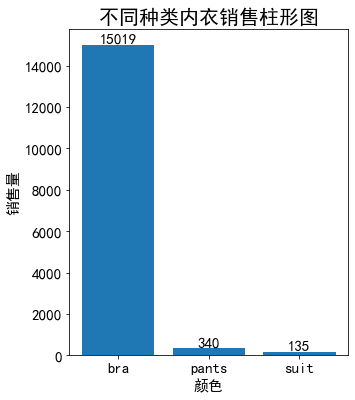

In [27]:
# 按种类查看销售情况
plt.rcParams['font.sans-serif'] = ['SimHei']     # 设置中文显示

fig = plt.figure(figsize=(5,6))    # 生成新的图片
ax = fig.add_subplot(111)      # 创建一个子图

type_counts = data.type.value_counts()
type_x = type_counts.index          # 生成x轴数据
type_y = type_counts.values       # 生成y轴数据

ax.bar(type_x,type_y)         # 绘制柱形图
plt.xlabel('颜色',fontsize='15')      # 设置x轴标签
plt.ylabel('销售量',fontsize='15')      # 设置y轴标签
plt.title('不同种类内衣销售柱形图',fontsize='20')     # 设置柱形图标题
plt.tick_params(labelsize=15)    #刻度字体大小13

for a,b in zip(type_x,type_y):
    plt.text(a, b-0.3,'%.0f'%b, ha = 'center',va = 'bottom',fontsize=15)    # 添加数据标签
plt.show()


#### 从上图我们可以看出，2016年和2017年共销售了15019件文胸，340件内裤和135套内衣，这说明如果我们要开一家内衣店的话，应将销售对象放在文胸上。
#### 但是，为了方便店铺存货，我们需要知道哪些尺码、哪些颜色卖得好。

#### 3.1.1 按尺码查看不同种类内衣的销售情况

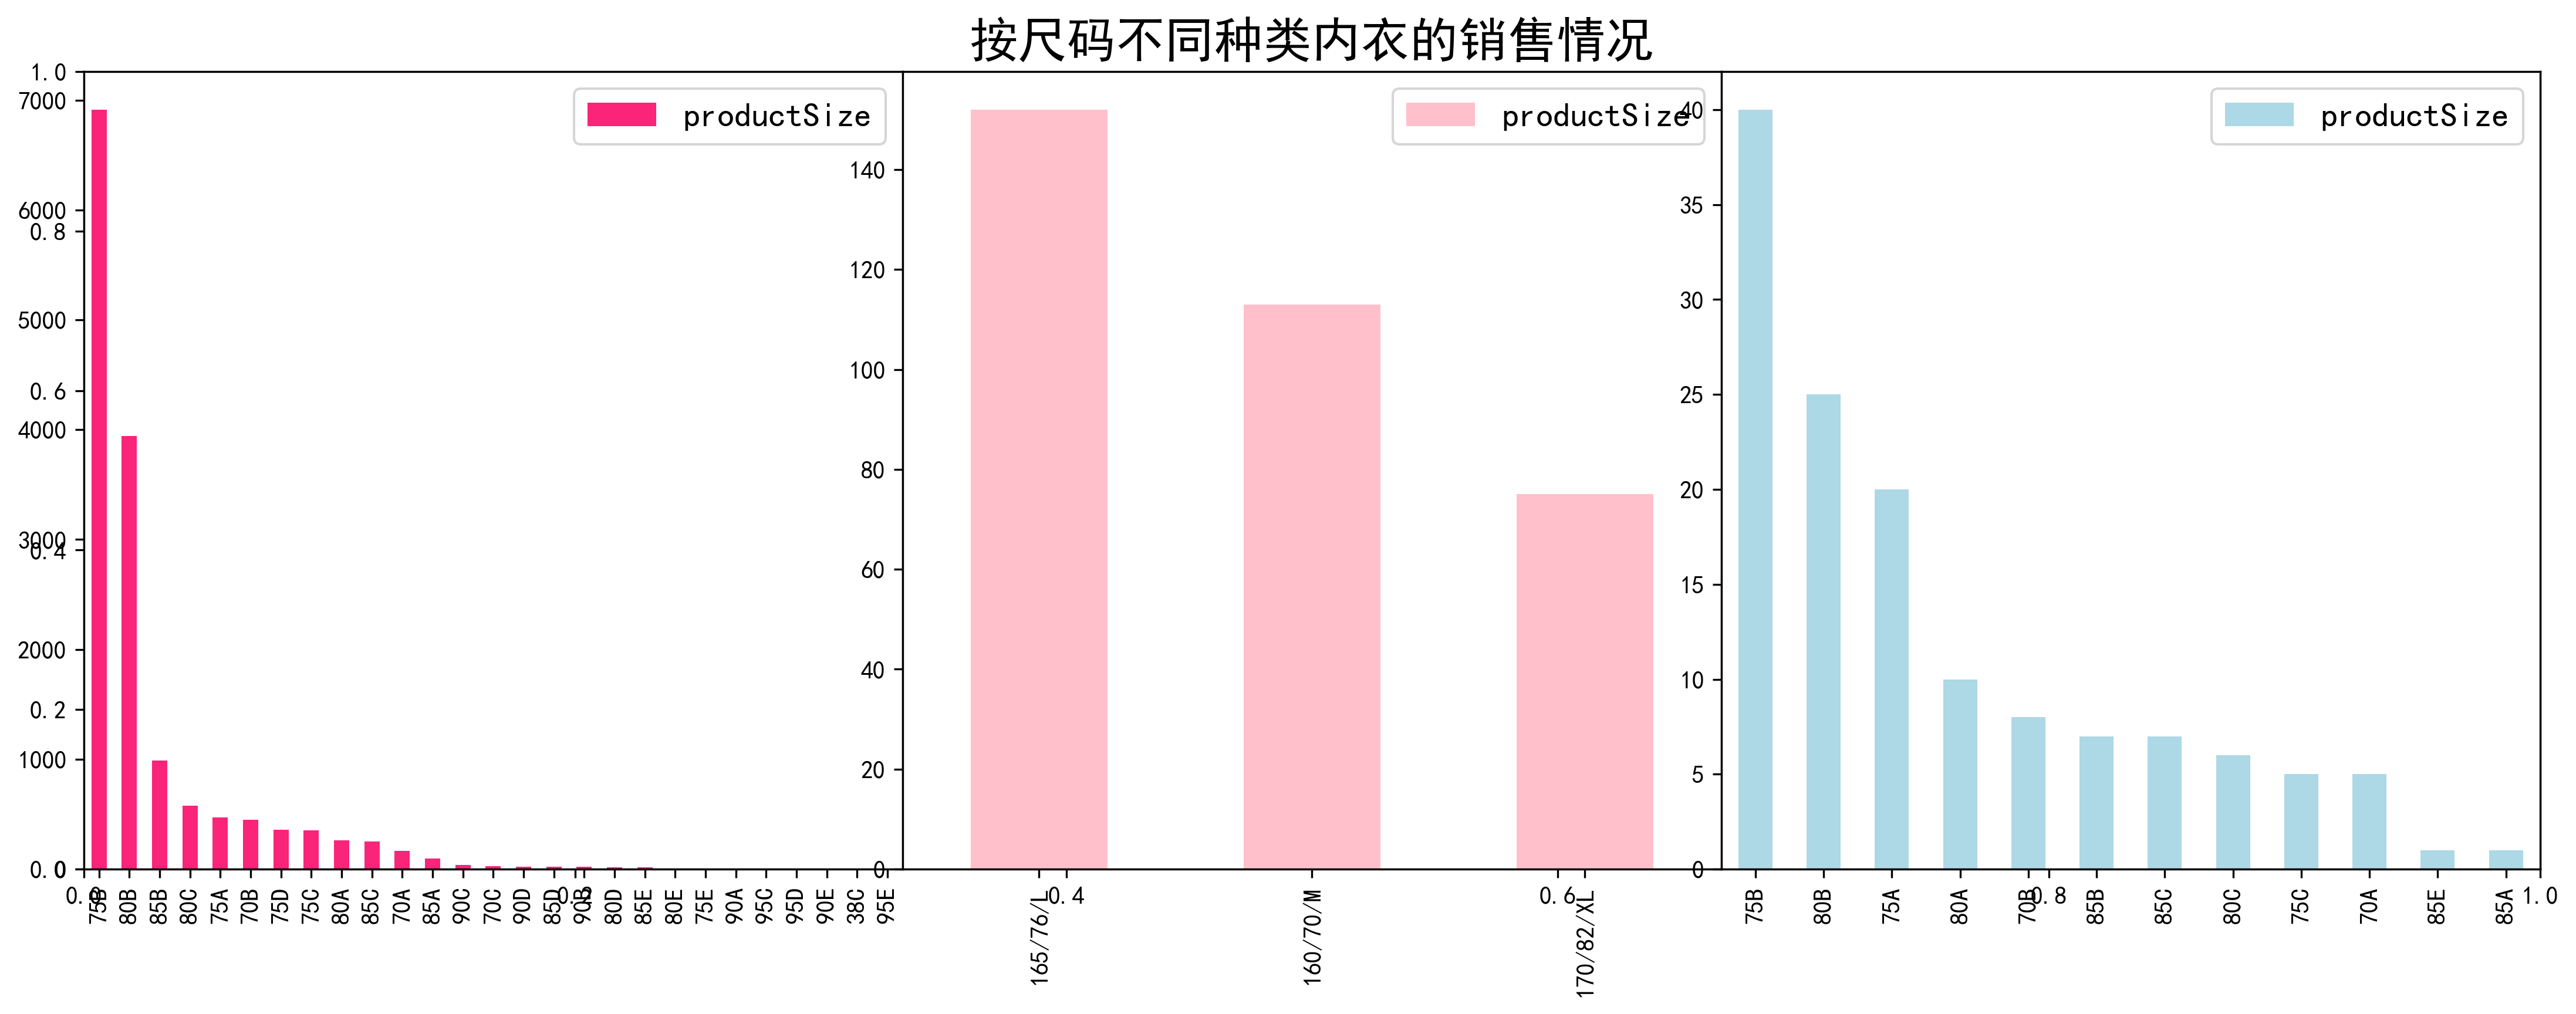

In [28]:
plt.rcParams['font.sans-serif'] = ['SimHei']     # 设置中文显示
plt.rcParams['axes.unicode_minus'] = False     # 解决图片显示为负号'-'显示为方块的问题
plt.rcParams['savefig.dpi'] = 300     # 图片像素
plt.rcParams['figure.dpi'] = 300      # 分辨率


# 按尺码查看不同种类内衣的销售情况
fig=plt.figure(figsize=(18,6))
fig.set(alpha=0.8)    # 设置图像透明度
plt.title("按尺码不同种类内衣的销售情况",fontsize=20)   # 设置图形标题


'''查看文胸销售情况'''
ax1=fig.add_subplot(131)
data.productSize[data['type'] == 'bra'].value_counts().plot(kind = 'bar',color='#FA2479')
ax1.legend(loc='best',fontsize=14)


'''查看内裤销售情况'''
ax2=fig.add_subplot(132)
data.productSize[data['type'] == 'pants'].value_counts().plot(kind = 'bar',color='pink')
ax2.legend(loc='best',fontsize=14)


'''查看套装销售情况'''
ax3=fig.add_subplot(133)
data.productSize[data['type'] == 'suit'].value_counts().plot(kind = 'bar',color='lightblue')
ax3.legend(loc='best',fontsize=14)

plt.subplots_adjust(wspace=0,hspace=0)    #调整子图周围的间距
plt.show()

#### 由上图可以看出，75B的文胸尺码、L码的内裤和75B的套装销售量最高

#### 3.1.2 按颜色查看不同种类内衣的销售情况

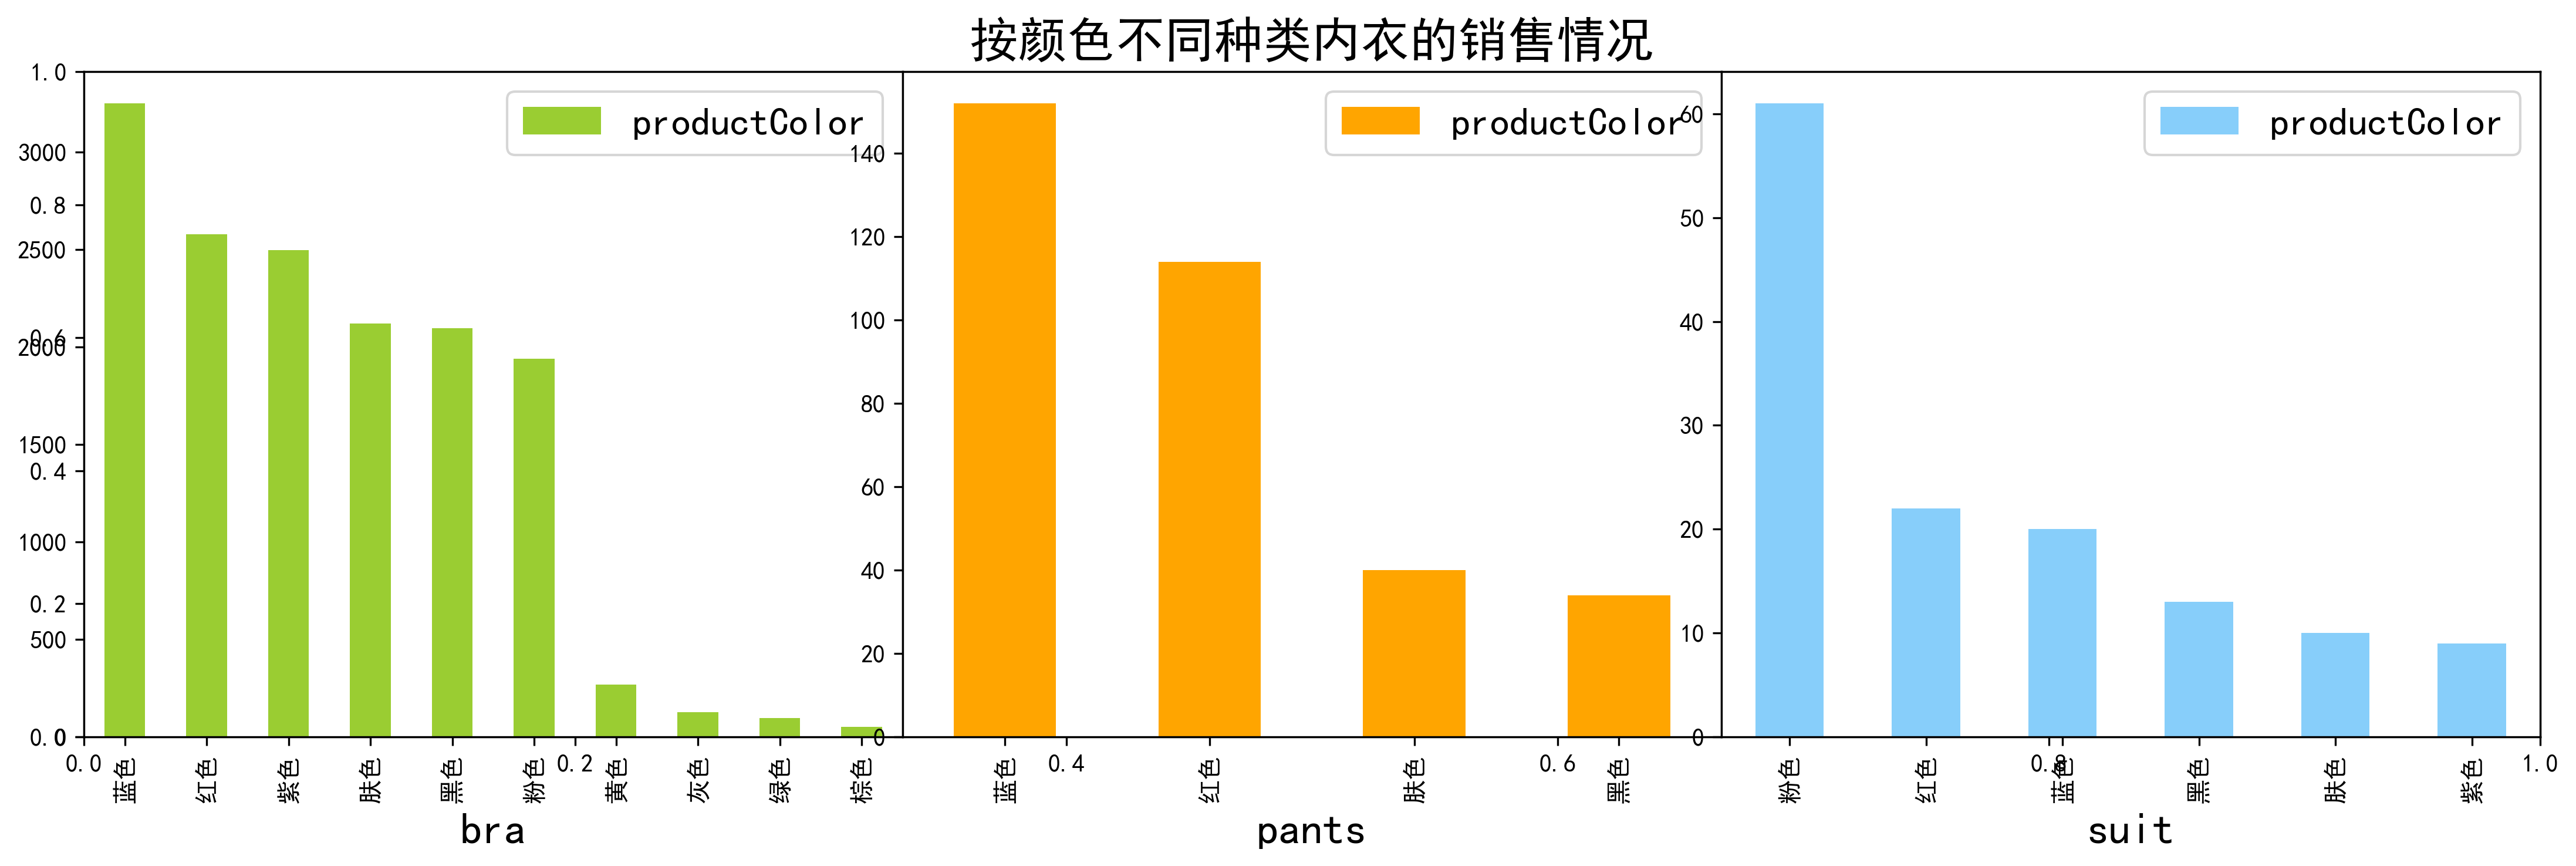

In [29]:
# 按颜色码查看不同种类内衣的销售情况
fig=plt.figure(figsize=(18,5))
plt.rcParams['savefig.dpi'] = 300     # 图片像素
plt.rcParams['figure.dpi'] = 300      # 分辨率
fig.set(alpha=0.8)    # 设置图像透明度
plt.title("按颜色不同种类内衣的销售情况",fontsize=20)   # 设置图形标题


'''查看文胸销售情况'''
ax1=fig.add_subplot(131)
data.productColor[data['type'] == 'bra'].value_counts().plot(kind = 'bar',color='yellowgreen')
ax1.set_xlabel("bra",fontsize='18') 
ax1.legend(loc='best',fontsize=16)


'''查看内裤销售情况'''
ax2=fig.add_subplot(132)
data.productColor[data['type'] == 'pants'].value_counts().plot(kind = 'bar',color='orange')
ax2.set_xlabel("pants",fontsize='18') 
ax2.legend(loc='best',fontsize=16)


'''查看套装销售情况'''
ax3=fig.add_subplot(133)
data.productColor[data['type'] == 'suit'].value_counts().plot(kind = 'bar',color='lightskyblue')
ax3.set_xlabel("suit",fontsize='18') 
ax3.legend(loc='best',fontsize=16)

plt.subplots_adjust(wspace=0,hspace=0)    #调整子图周围的间距
plt.show()

#### 由上图可以看出，文胸、内裤和套装销售量最高的是分别是蓝色、蓝色和粉色。
#### 接下来,我们需要看一下文胸的销售情况

### 3.2 查看文胸的销售情况

#### 3.2.1 按尺码查看文胸销售情况

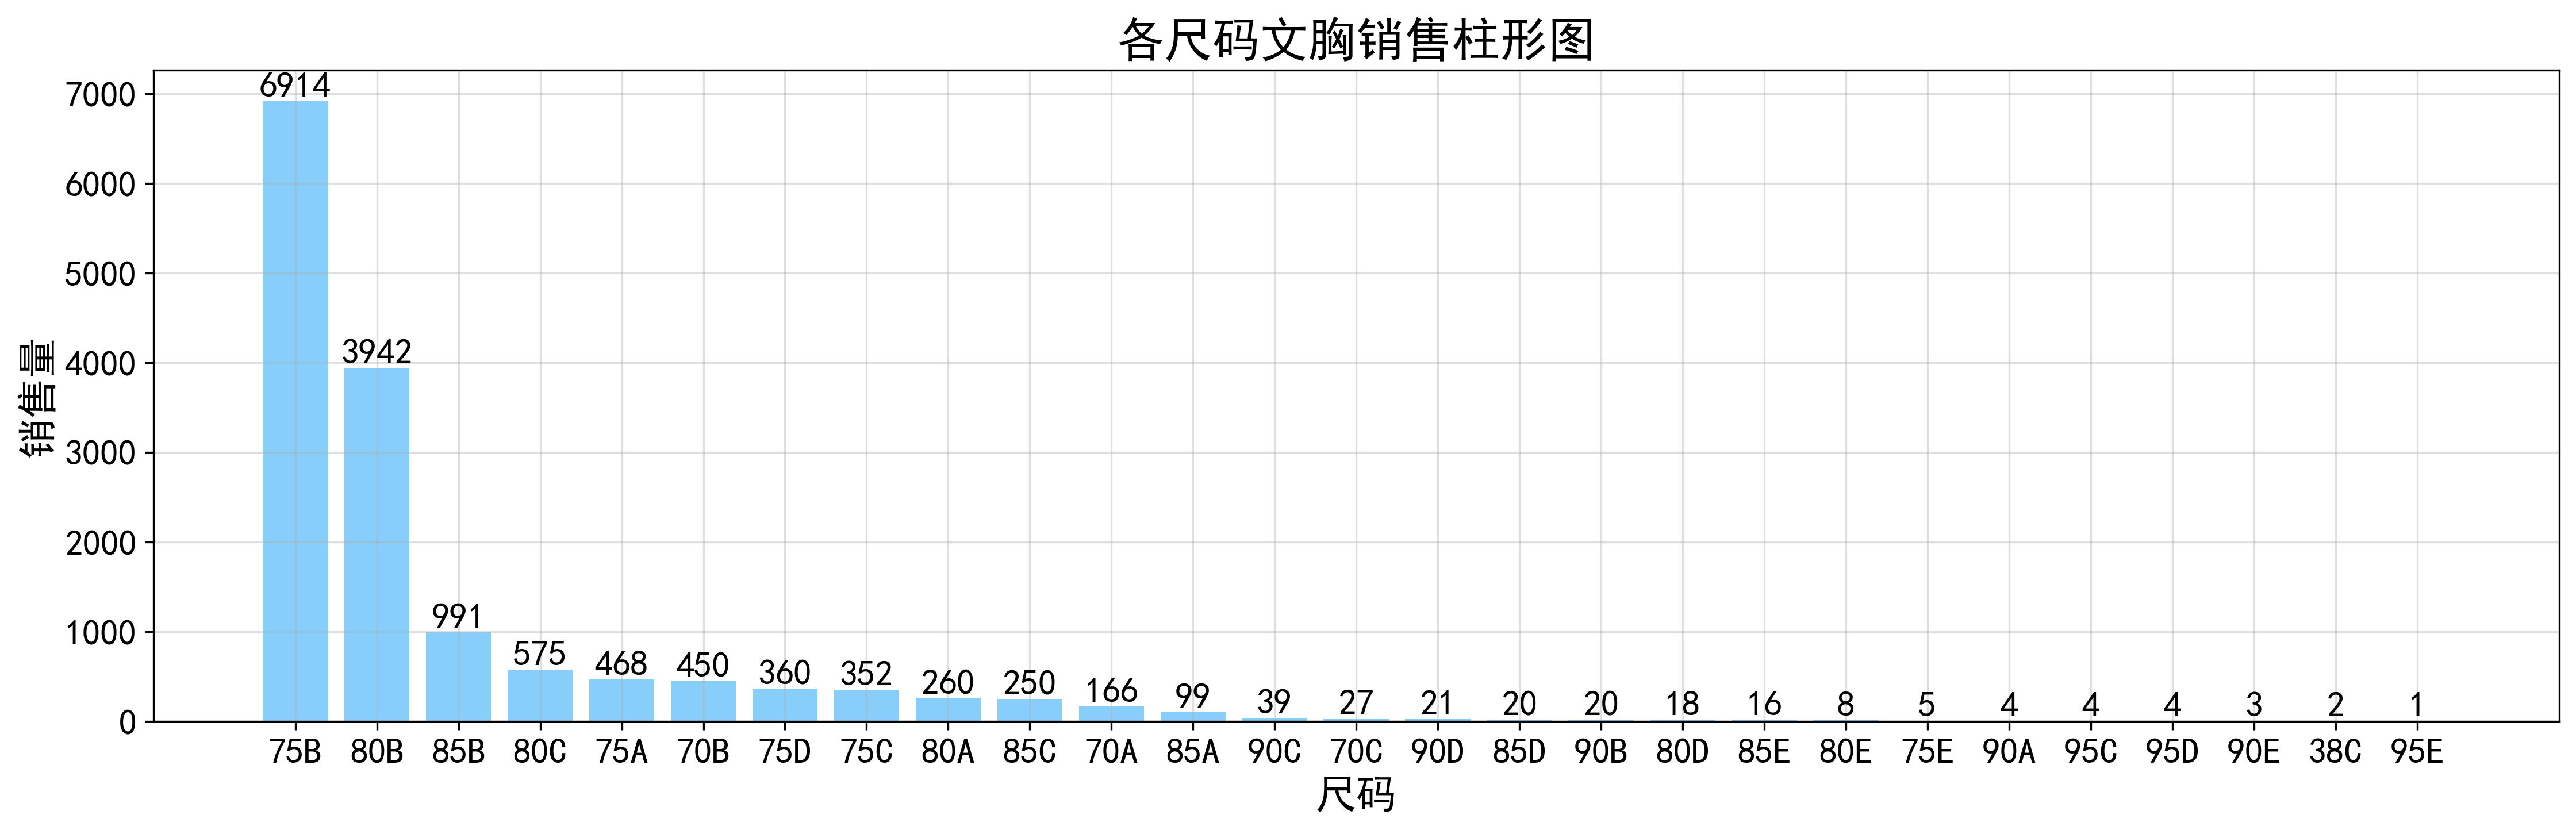

In [30]:
# 按尺码查看文胸销售情况

fig = plt.figure(figsize=(18, 5))
fig.tight_layout()
ax = fig.add_subplot(111)
color_counts = data.productSize[data['type'] == 'bra'].value_counts()
color_x = color_counts.index
color_y = color_counts.values

ax.bar(color_x,color_y,color='lightskyblue')
plt.xlabel('尺码',fontsize='17')      # 设置x轴标签
plt.ylabel('销售量',fontsize='17')      # 设置y轴标签
plt.tick_params(labelsize=15)    #刻度字体大小15
plt.grid(alpha=0.4)                # 设置网格线
plt.title('各尺码文胸销售柱形图',fontsize='20')     # 设置柱形图标题
# 添加数据标签
for a,b in zip(color_x,color_y):
    plt.text(a, b-0.3,'%.0f'%b, ha = 'center',va = 'bottom',fontsize=15)
plt.show()


#### 上图可以看出,文胸销售量最高的是75B、其次是80B，销售量均超过3000，远超第三名，销售量最低的是95E，只销售了一件。相对来说，B类和A类尺码的文胸卖得好，E类文胸卖的少。

#### 3.2.2 按颜色查看文胸销售情况

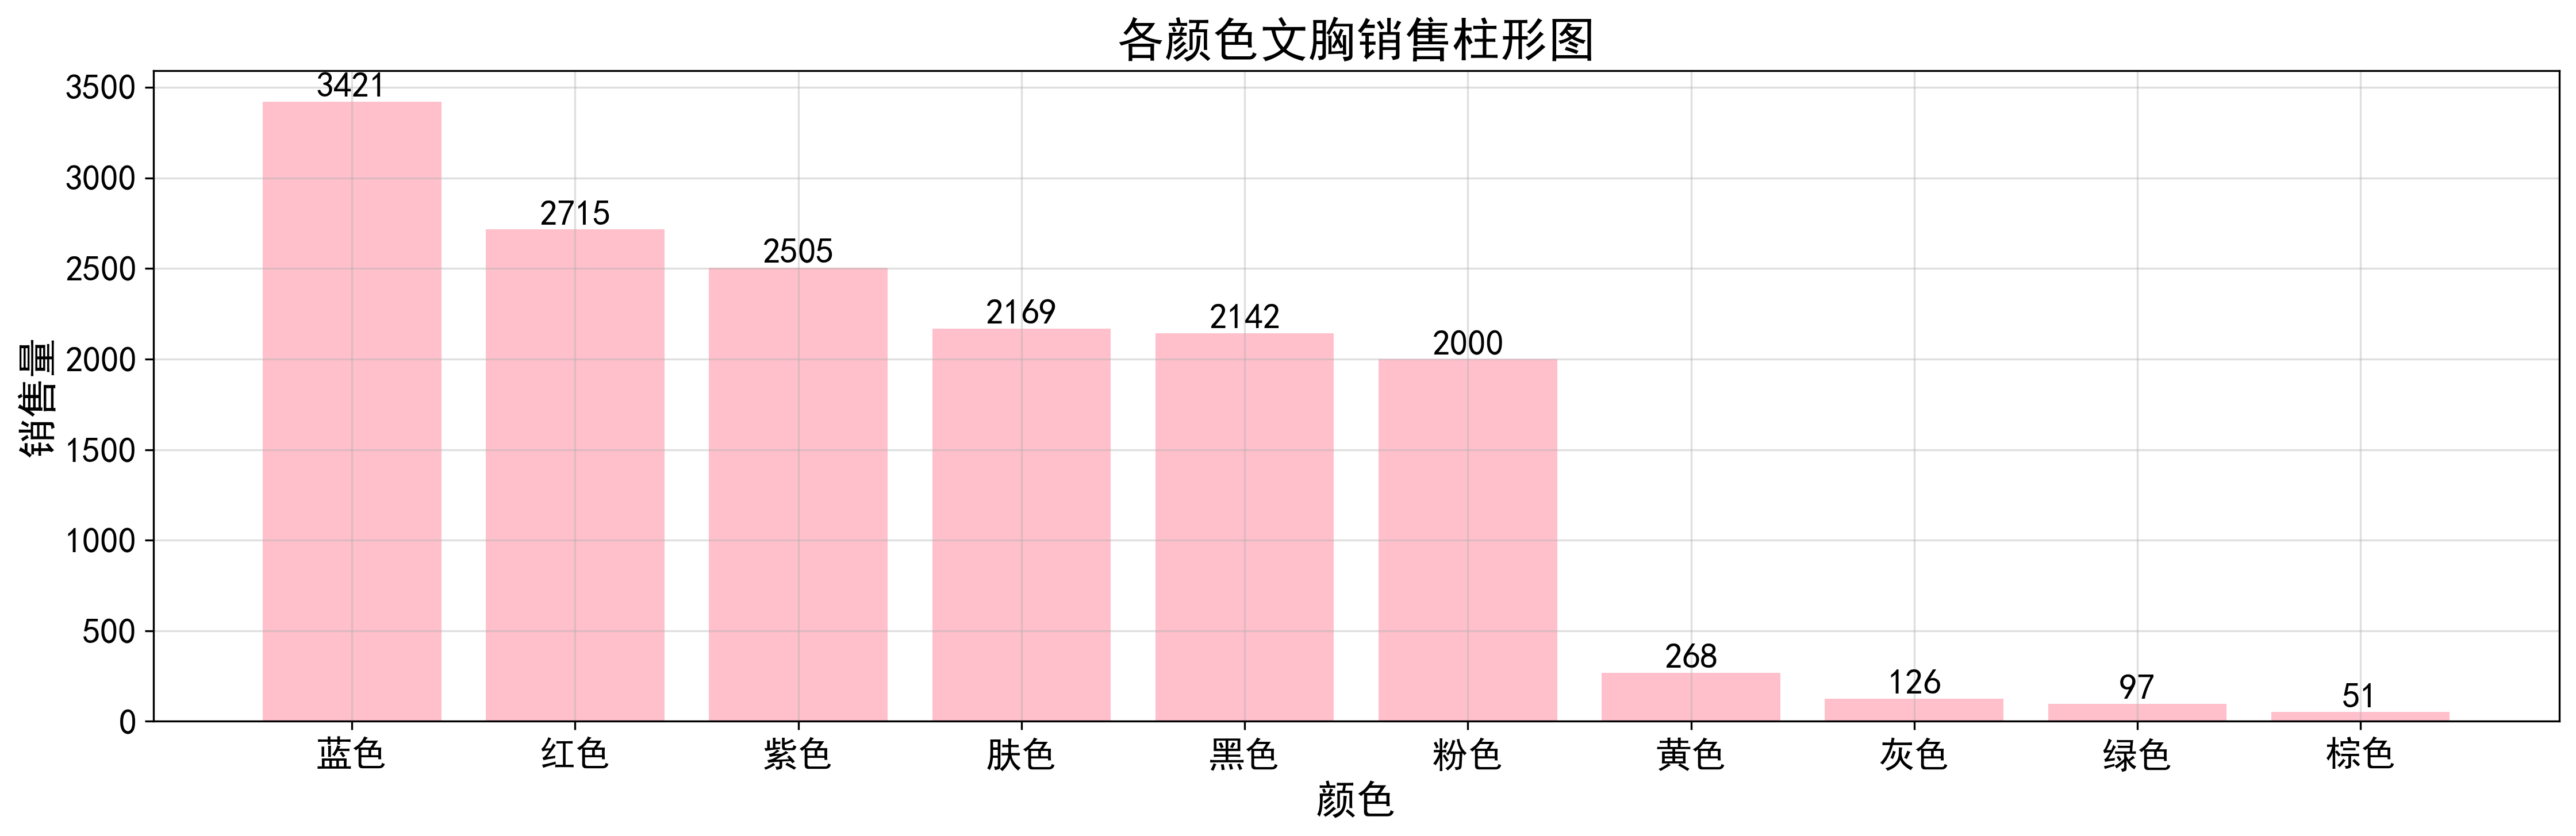

In [31]:
# 按颜色尺码查看文胸销售情况

fig = plt.figure(figsize=(18, 5))
fig.tight_layout()
ax = fig.add_subplot(111)
color_counts = data['productColor'].value_counts()
color_x = color_counts.index
color_y = color_counts.values

ax.bar(color_x,color_y,color='pink')
plt.xlabel('颜色',fontsize='17')      # 设置x轴标签
plt.ylabel('销售量',fontsize='17')      # 设置y轴标签
plt.title('各颜色文胸销售柱形图',fontsize='20')     # 设置柱形图标题
plt.tick_params(labelsize=15)    #刻度字体大小15
plt.grid(alpha=0.4)                # 设置网格线

for a,b in zip(color_x,color_y):
    plt.text(a, b-0.3,'%.0f'%b, ha = 'center',va = 'bottom',fontsize=15)
plt.show()


#### 上图可以看出,文胸销售量最高的是蓝色、其次是红色和紫色，销售量均超过2500，销售量较低的是黄色、灰色、绿色还有棕色。

#### 3.2.3 按颜色尺码查看文胸销售情况

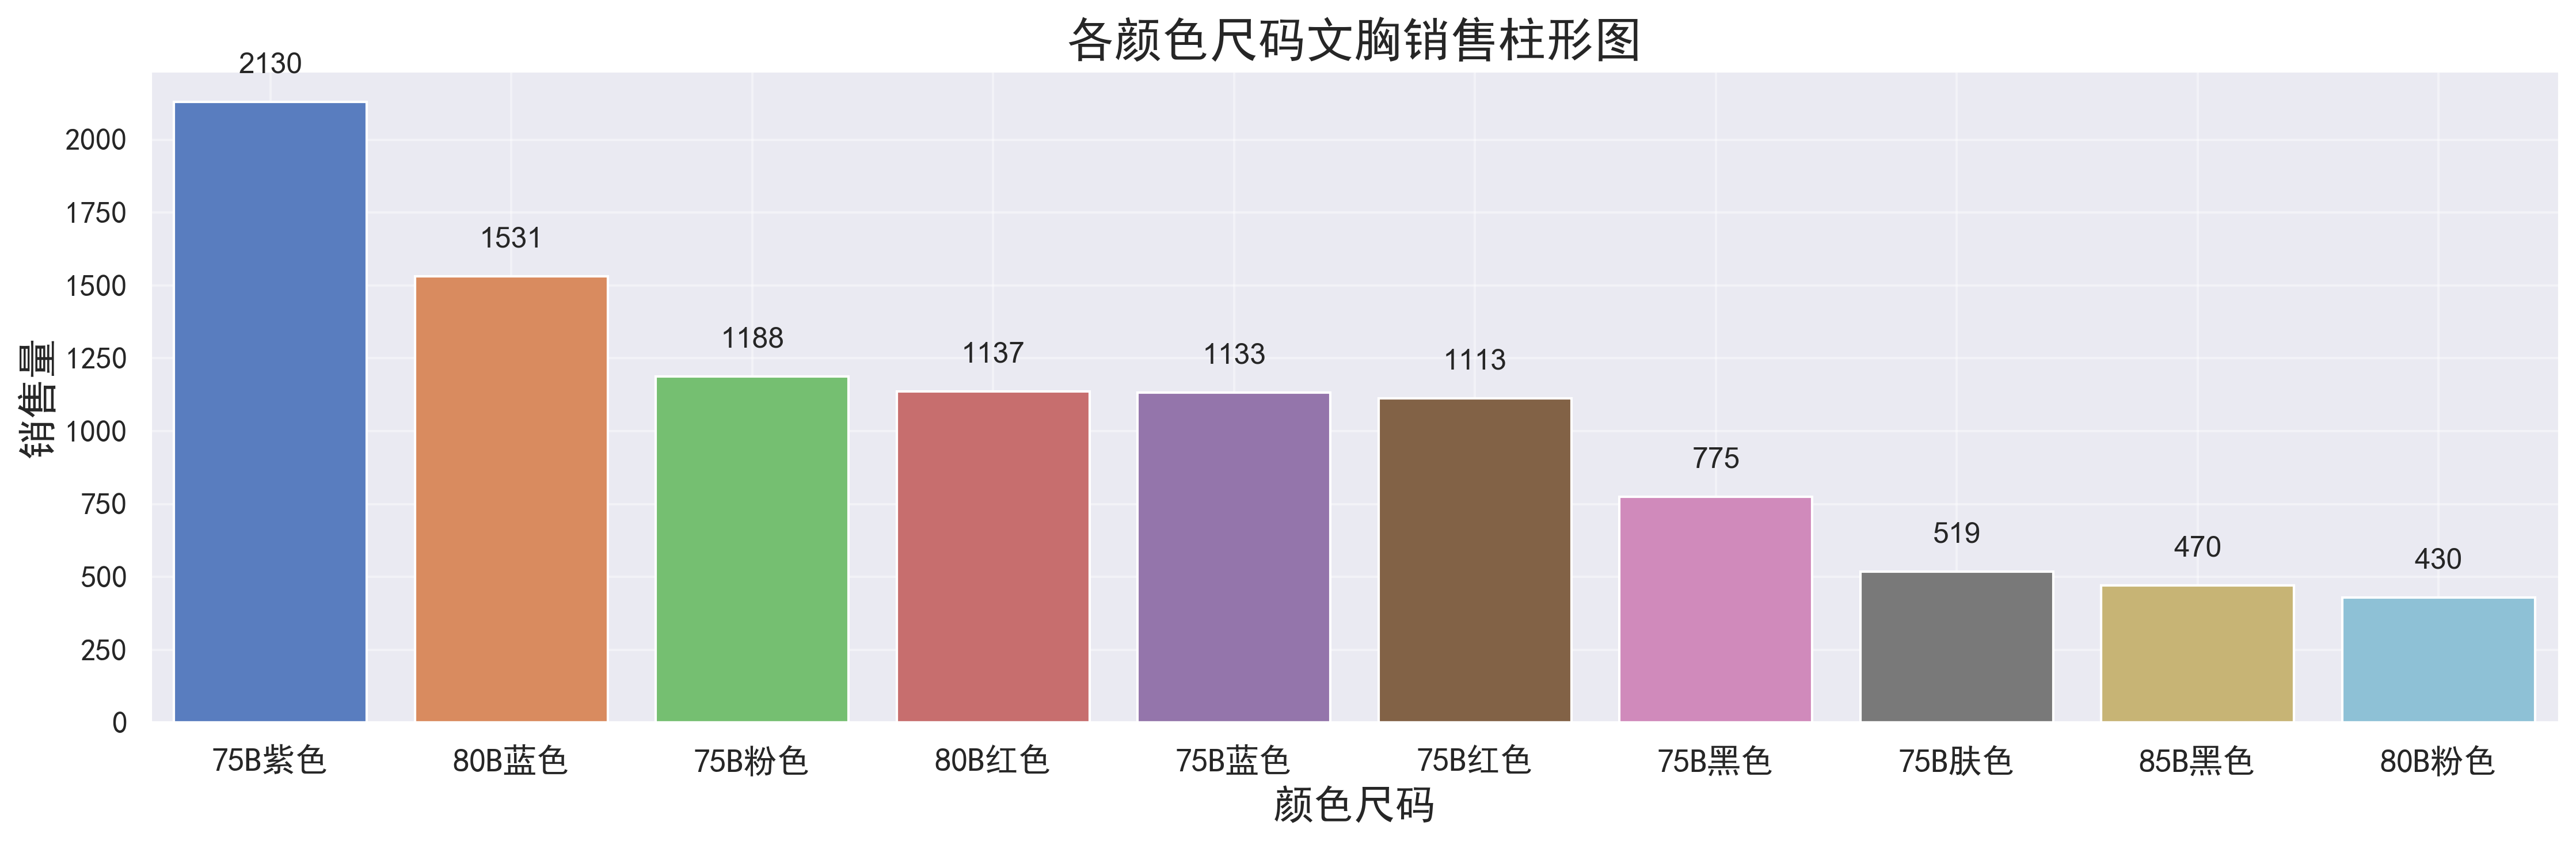

In [32]:
# 按颜色尺码查看文胸销售情况
sns.set(font='SimHei')      # 设置中文显示
fig = plt.figure(figsize=(18, 5))
fig.tight_layout()
ax = fig.add_subplot(111)
color_size_counts = (data['productSize'] + data['productColor']).value_counts()[:10]   # 取销售量的前十位
x = color_size_counts.index    
y = color_size_counts.values

sns.set_style("darkgrid")
ax = sns.barplot(x=x, y=y, palette="muted")
plt.xticks(fontsize=14)
plt.yticks(fontsize=13)
plt.xlabel('颜色尺码',fontsize='17')      # 设置x轴标签
plt.ylabel('销售量',fontsize='17')      # 设置y轴标签
plt.title('各颜色尺码文胸销售柱形图',fontsize='20')     # 设置柱形图标题
plt.grid(alpha=0.4)                # 设置网格线

for p in ax.patches:
    height = p.get_height()   # 获取每个柱形图的高度
    ax.text(x = p.get_x()+(p.get_width()/2),y = height+100,s = '{:.0f}'.format(height), ha = 'center')    #添加数据标签

plt.show() 

#### 上图可以看出,根据颜色尺码来看，文胸销售量前三的是75B的紫色、80B的蓝色和75B的粉色，销售量均超过1000。

### 3.3 查看月销售情况

In [33]:
data.month.value_counts()   #查看内衣月销售情况

10    3831
11    3569
9     1728
6     1216
8     1075
7      916
5      806
3      671
4      657
12     495
1      272
2      258
Name: month, dtype: int64

#### 从数据中我们可以看出，不同月份内衣的销售情况有很大的差异，因此，我们需要更进一步分析不同月份内衣的销售情况

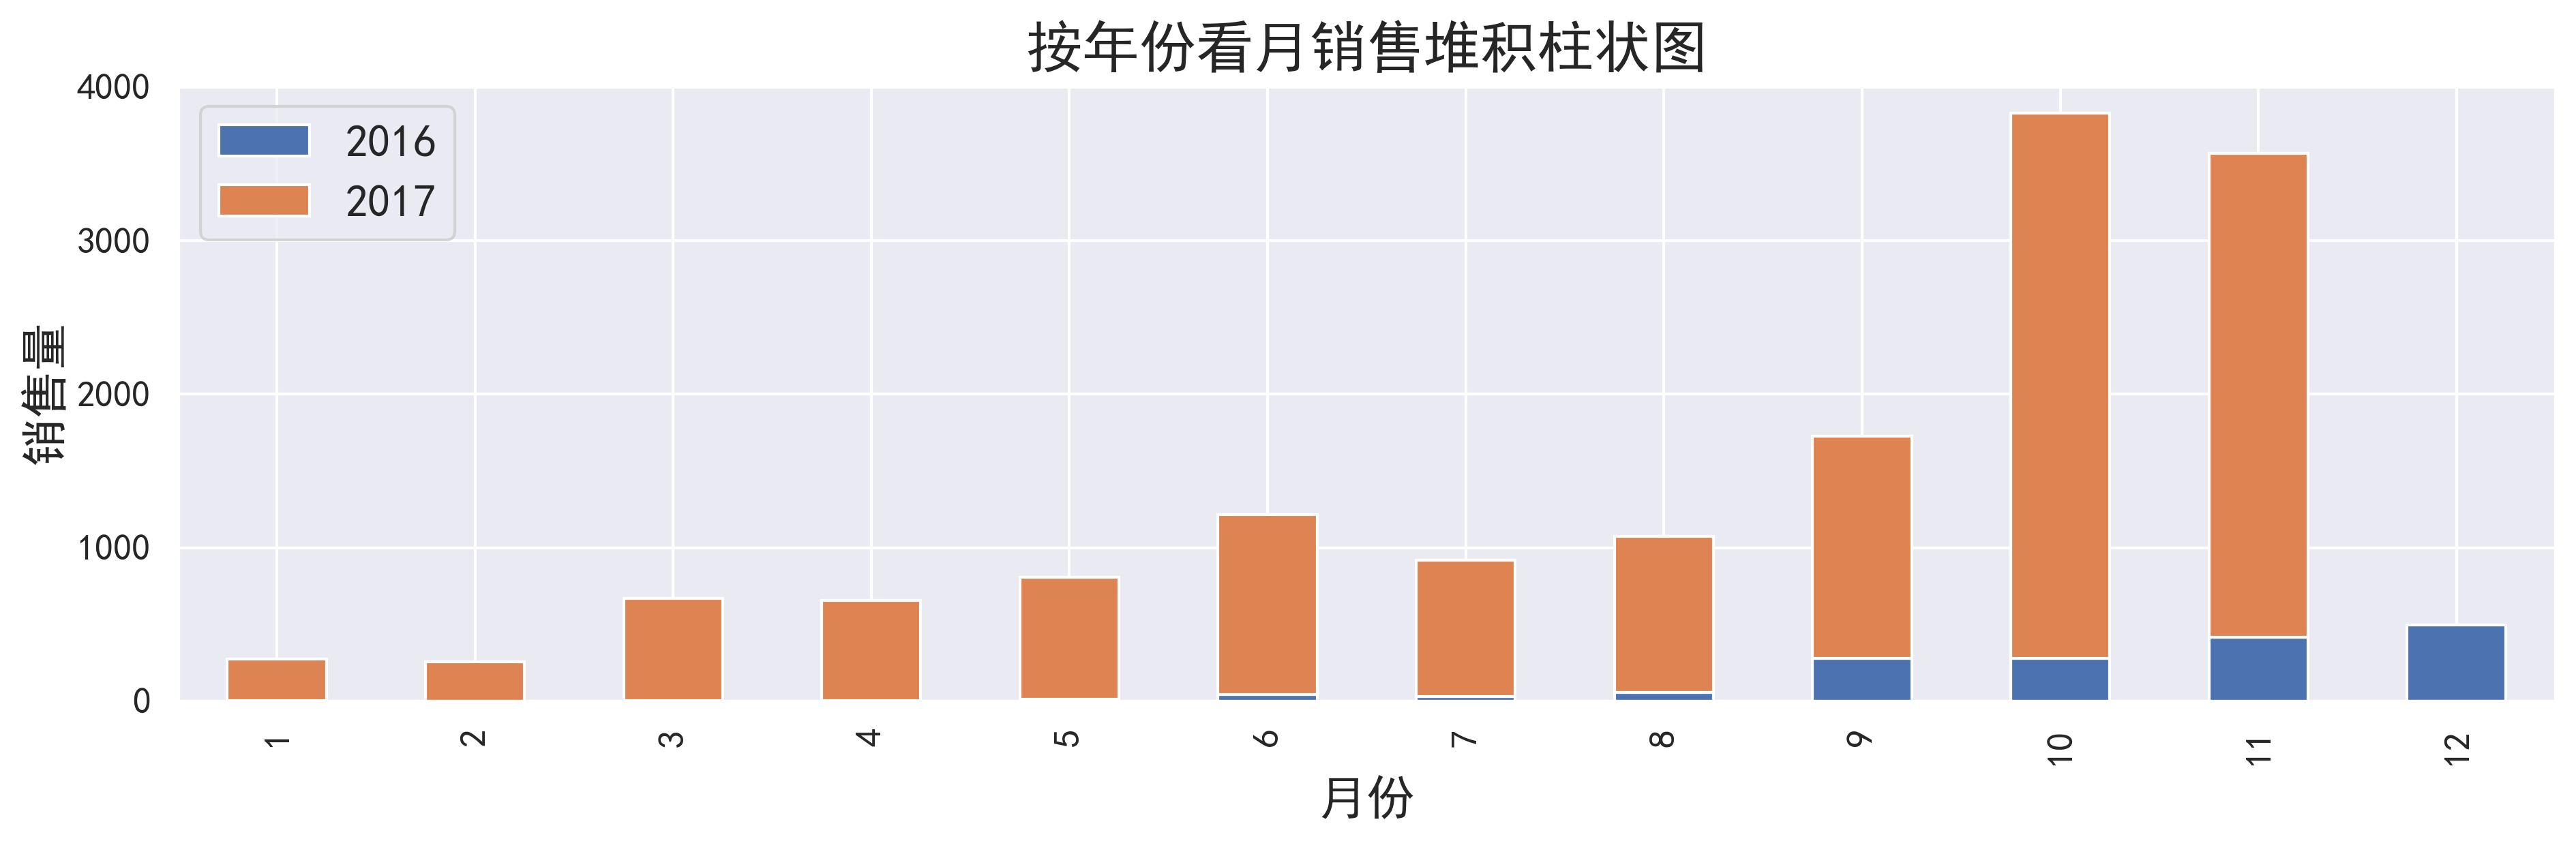

In [34]:
'''按年份看每月销售情况'''
plt.rcParams['font.sans-serif'] = ['SimHei']     # 设置中文显示
sale_2016 = data.month[data.year == 2016].value_counts()
sale_2017 = data.month[data.year == 2017].value_counts()
df = pd.DataFrame({2016:sale_2016, 2017:sale_2017})

df.plot(kind='bar',stacked=True,figsize=(15,4))
plt.title("按年份看月销售堆积柱状图",fontsize='20')
plt.xlabel("月份",fontsize='17') 
plt.ylabel("销售量",fontsize='17')
plt.tick_params(labelsize=13)    #刻度字体大小13
plt.legend(loc = 'upper left',fontsize=16)
plt.show()


#### 十月销售量最高，其次是11月和9月，也就是说，相对来说，第四季度内衣销售量较高，其次是第二季度，第一季度销售量最低。

## 4. 总结

### 1. 如果我们要开一家内衣店的话，应将销售对象放在文胸上。
### 2. 文胸、内裤和套装销售量最高的是分别是蓝色、蓝色和粉色。
### 3. 75B的文胸尺码、L码的内裤和75B的套装销售量最高。
### 4. 相对来说，第四季度内衣销售量较高，其次是第二季度，第一季度销售量最低。
### 5.文胸：（1）销售量最高的颜色是蓝色、其次是红色和紫色，销售量较低的是黄色、灰色、绿色还有棕色。（2）销售量最高的尺码是75B、其次是80B，最低的是95E，相对来说，B类和A类尺码的文胸卖得好，E类文胸卖的少。（3）根据颜色尺码来看，文胸销售量前三的是75B的紫色、80B的蓝色和75B的粉色，销售量均超过1000